#### Clean the data

In [10]:
import pandas as pd

# Load data with UTF-8 encoding for Chinese text
file_path = '/home/disk1/red_disk1/zhiyi/zhiyi_data/xhs_style_post_20231101_20241001.csv'
data = pd.read_csv(file_path, encoding='utf-8')

# Remove duplicate rows
data.drop_duplicates(inplace=True)

# Verify removal of duplicates
data.info()

# Save the cleaned data to a new CSV file
new_file_path = '/home/disk1/red_disk1/zhiyi/zhiyi_data/xhs_style_post_cleaned.csv'
data.to_csv(new_file_path, index=False, encoding='utf-8')

print("Duplicates removed and cleaned data saved to a new CSV file successfully.")


<class 'pandas.core.frame.DataFrame'>
Int64Index: 55652253 entries, 0 to 55652357
Data columns (total 25 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   union_id        object
 1   gender          object
 2   race            object
 3   season          object
 4   style_new       object
 5   root_category   object
 6   category        object
 7   kid_category    object
 8   collar          object
 9   sleeve          object
 10  sleeve_type     object
 11  fabric          object
 12  contour         object
 13  clothes_age     object
 14  clothes_length  object
 15  texture         object
 16  accessories     object
 17  technology_new  object
 18  color           object
 19  note_id         object
 20  user_id         object
 21  publish_time    object
 22  like_num        int64 
 23  comment_num     int64 
 24  collect_num     int64 
dtypes: int64(3), object(22)
memory usage: 10.8+ GB
Duplicates removed and cleaned data saved to a new CSV file successfully.


In [11]:
import pandas as pd

# Load data with UTF-8 encoding for Chinese text
file_path = '/home/disk1/red_disk1/zhiyi/zhiyi_data/xhs_style_post_cleaned.csv'
data = pd.read_csv(file_path, encoding='utf-8')

# Count total rows in the dataset
total_rows_count = data.shape[0]

# Display the result
print("Total rows:", total_rows_count)

# Count distinct rows by considering all columns (to ensure row uniqueness)
distinct_rows_count = data.drop_duplicates().shape[0]

# Count distinct values in the 'union_id' column
distinct_union_id_count = data['union_id'].nunique()

# Count distinct values in the 'note_id' column
distinct_note_id_count = data['note_id'].nunique()

# Display the results
print("Distinct rows:", distinct_rows_count)
print("Distinct union_id values:", distinct_union_id_count)
print("Distinct note_id values:", distinct_note_id_count)

# Count distinct values in the 'style_new' column
distinct_style_new_count = data['style_new'].nunique()

# Display the result
print("Distinct style_new values:", distinct_style_new_count)


Total rows: 55652253
Distinct rows: 55652253
Distinct union_id values: 32148236
Distinct note_id values: 14046535
Distinct style_new values: 2916


#### Check styles
1. Clusters the data by style_new.
2. Counts the unique union_id and note_id values for each style.
3. Sorts the styles by the count of note_id and selects the top 10 styles.
4. Visualizes the results in a bar chart.

findfont: Generic family 'sans-serif' not found because none of the following families were found: /usr/share/fonts/opentype/noto/NotoSansCJK-Regular.ttc
findfont: Generic family 'sans-serif' not found because none of the following families were found: /usr/share/fonts/opentype/noto/NotoSansCJK-Regular.ttc
findfont: Generic family 'sans-serif' not found because none of the following families were found: /usr/share/fonts/opentype/noto/NotoSansCJK-Regular.ttc
findfont: Generic family 'sans-serif' not found because none of the following families were found: /usr/share/fonts/opentype/noto/NotoSansCJK-Regular.ttc
findfont: Generic family 'sans-serif' not found because none of the following families were found: /usr/share/fonts/opentype/noto/NotoSansCJK-Regular.ttc
findfont: Generic family 'sans-serif' not found because none of the following families were found: /usr/share/fonts/opentype/noto/NotoSansCJK-Regular.ttc
findfont: Generic family 'sans-serif' not found because none of the followin

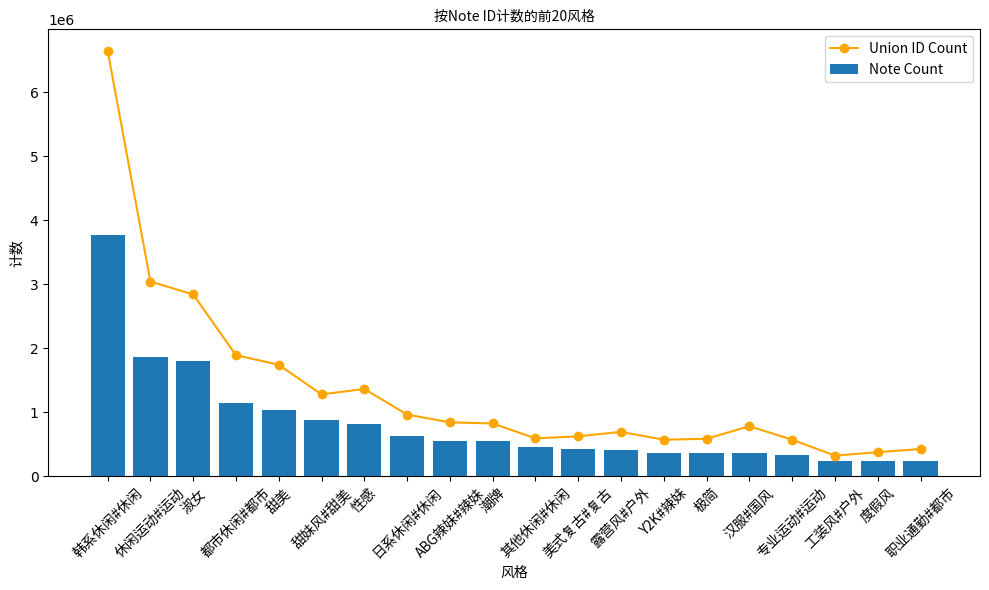

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
import matplotlib as mpl

# Set up the font properties for Chinese text
chinese_font_path = '/usr/share/fonts/opentype/noto/NotoSansCJK-Regular.ttc'
chinese_font = FontProperties(fname=chinese_font_path)
mpl.rcParams['font.sans-serif'] = [chinese_font_path]  # Set default font for matplotlib
mpl.rcParams['axes.unicode_minus'] = False  # Ensure minus signs display correctly

# Group by 'style_new' and count unique 'union_id' and 'note_id' for each style
style_counts = data.groupby('style_new').agg(
    unique_union_id_count=('union_id', 'nunique'),
    note_id_count=('note_id', 'nunique')
).reset_index()

# Sort by 'note_id_count' to get the top 20 styles
top_10_styles = style_counts.sort_values(by='note_id_count', ascending=False).head(20)

# Plotting the top 20 styles
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(top_10_styles['style_new'], top_10_styles['note_id_count'], label='Note Count')
ax.plot(top_10_styles['style_new'], top_10_styles['unique_union_id_count'], color='orange', marker='o', label='Union ID Count')

# Add labels and legend with Chinese font support
ax.set_xlabel('风格', fontproperties=chinese_font)  # 'Style' in Chinese
ax.set_ylabel('计数', fontproperties=chinese_font)  # 'Count' in Chinese
ax.set_title('按Note ID计数的前20风格', fontproperties=chinese_font)  # 'Top 20 Styles by Note ID Count' in Chinese
ax.legend(prop=chinese_font)
plt.xticks(rotation=45, fontproperties=chinese_font)
plt.tight_layout()

# Display the plot
plt.show()


In [16]:
# Display the results in a table format
top_10_styles.columns = ['Style', 'Union ID Count', 'Note ID Count']
print(top_10_styles)

         Style  Union ID Count  Note ID Count
2835   韩系休闲#休闲         6652903        3766756
294    休闲运动#运动         3045407        1861610
1823        淑女         2844417        1806944
2711   都市休闲#都市         1895395        1152323
2276        甜美         1745325        1043996
2146    甜妹风#甜美         1281870         883619
1099        性感         1367304         822733
1317   日系休闲#休闲          966857         627374
0     ABG辣妹#辣妹          846238         560452
2014        潮牌          828284         546727
425    其他休闲#休闲          595679         454576
2530   美式复古#复古          627452         430331
2760    露营风#户外          696957         420541
91      Y2K#辣妹          574497         371141
1541        极简          588853         370007
1634     汉服#国风          785735         369869
178    专业运动#运动          574032         336447
915     工装风#户外          326486         245441
1026       度假风          378800         240342
2658   职业通勤#都市          429713         235102


#### Visualize detailed information for top 5 styles
1. Filter for the Top 5 Styles based on distinct note_id.
2. Calculate Feature Distribution: For each style, calculate the distribution of each feature by counting unique union_id.
3. Create Horizontal Bar Charts: Display the distribution of each feature within each style as a horizontal bar chart.


生成 韩系休闲#休闲 的特征分布图


findfont: Generic family 'sans-serif' not found because none of the following families were found: /usr/share/fonts/opentype/noto/NotoSansCJK-Regular.ttc
findfont: Generic family 'sans-serif' not found because none of the following families were found: /usr/share/fonts/opentype/noto/NotoSansCJK-Regular.ttc
findfont: Generic family 'sans-serif' not found because none of the following families were found: /usr/share/fonts/opentype/noto/NotoSansCJK-Regular.ttc
findfont: Generic family 'sans-serif' not found because none of the following families were found: /usr/share/fonts/opentype/noto/NotoSansCJK-Regular.ttc
findfont: Generic family 'sans-serif' not found because none of the following families were found: /usr/share/fonts/opentype/noto/NotoSansCJK-Regular.ttc
findfont: Generic family 'sans-serif' not found because none of the following families were found: /usr/share/fonts/opentype/noto/NotoSansCJK-Regular.ttc
findfont: Generic family 'sans-serif' not found because none of the followin

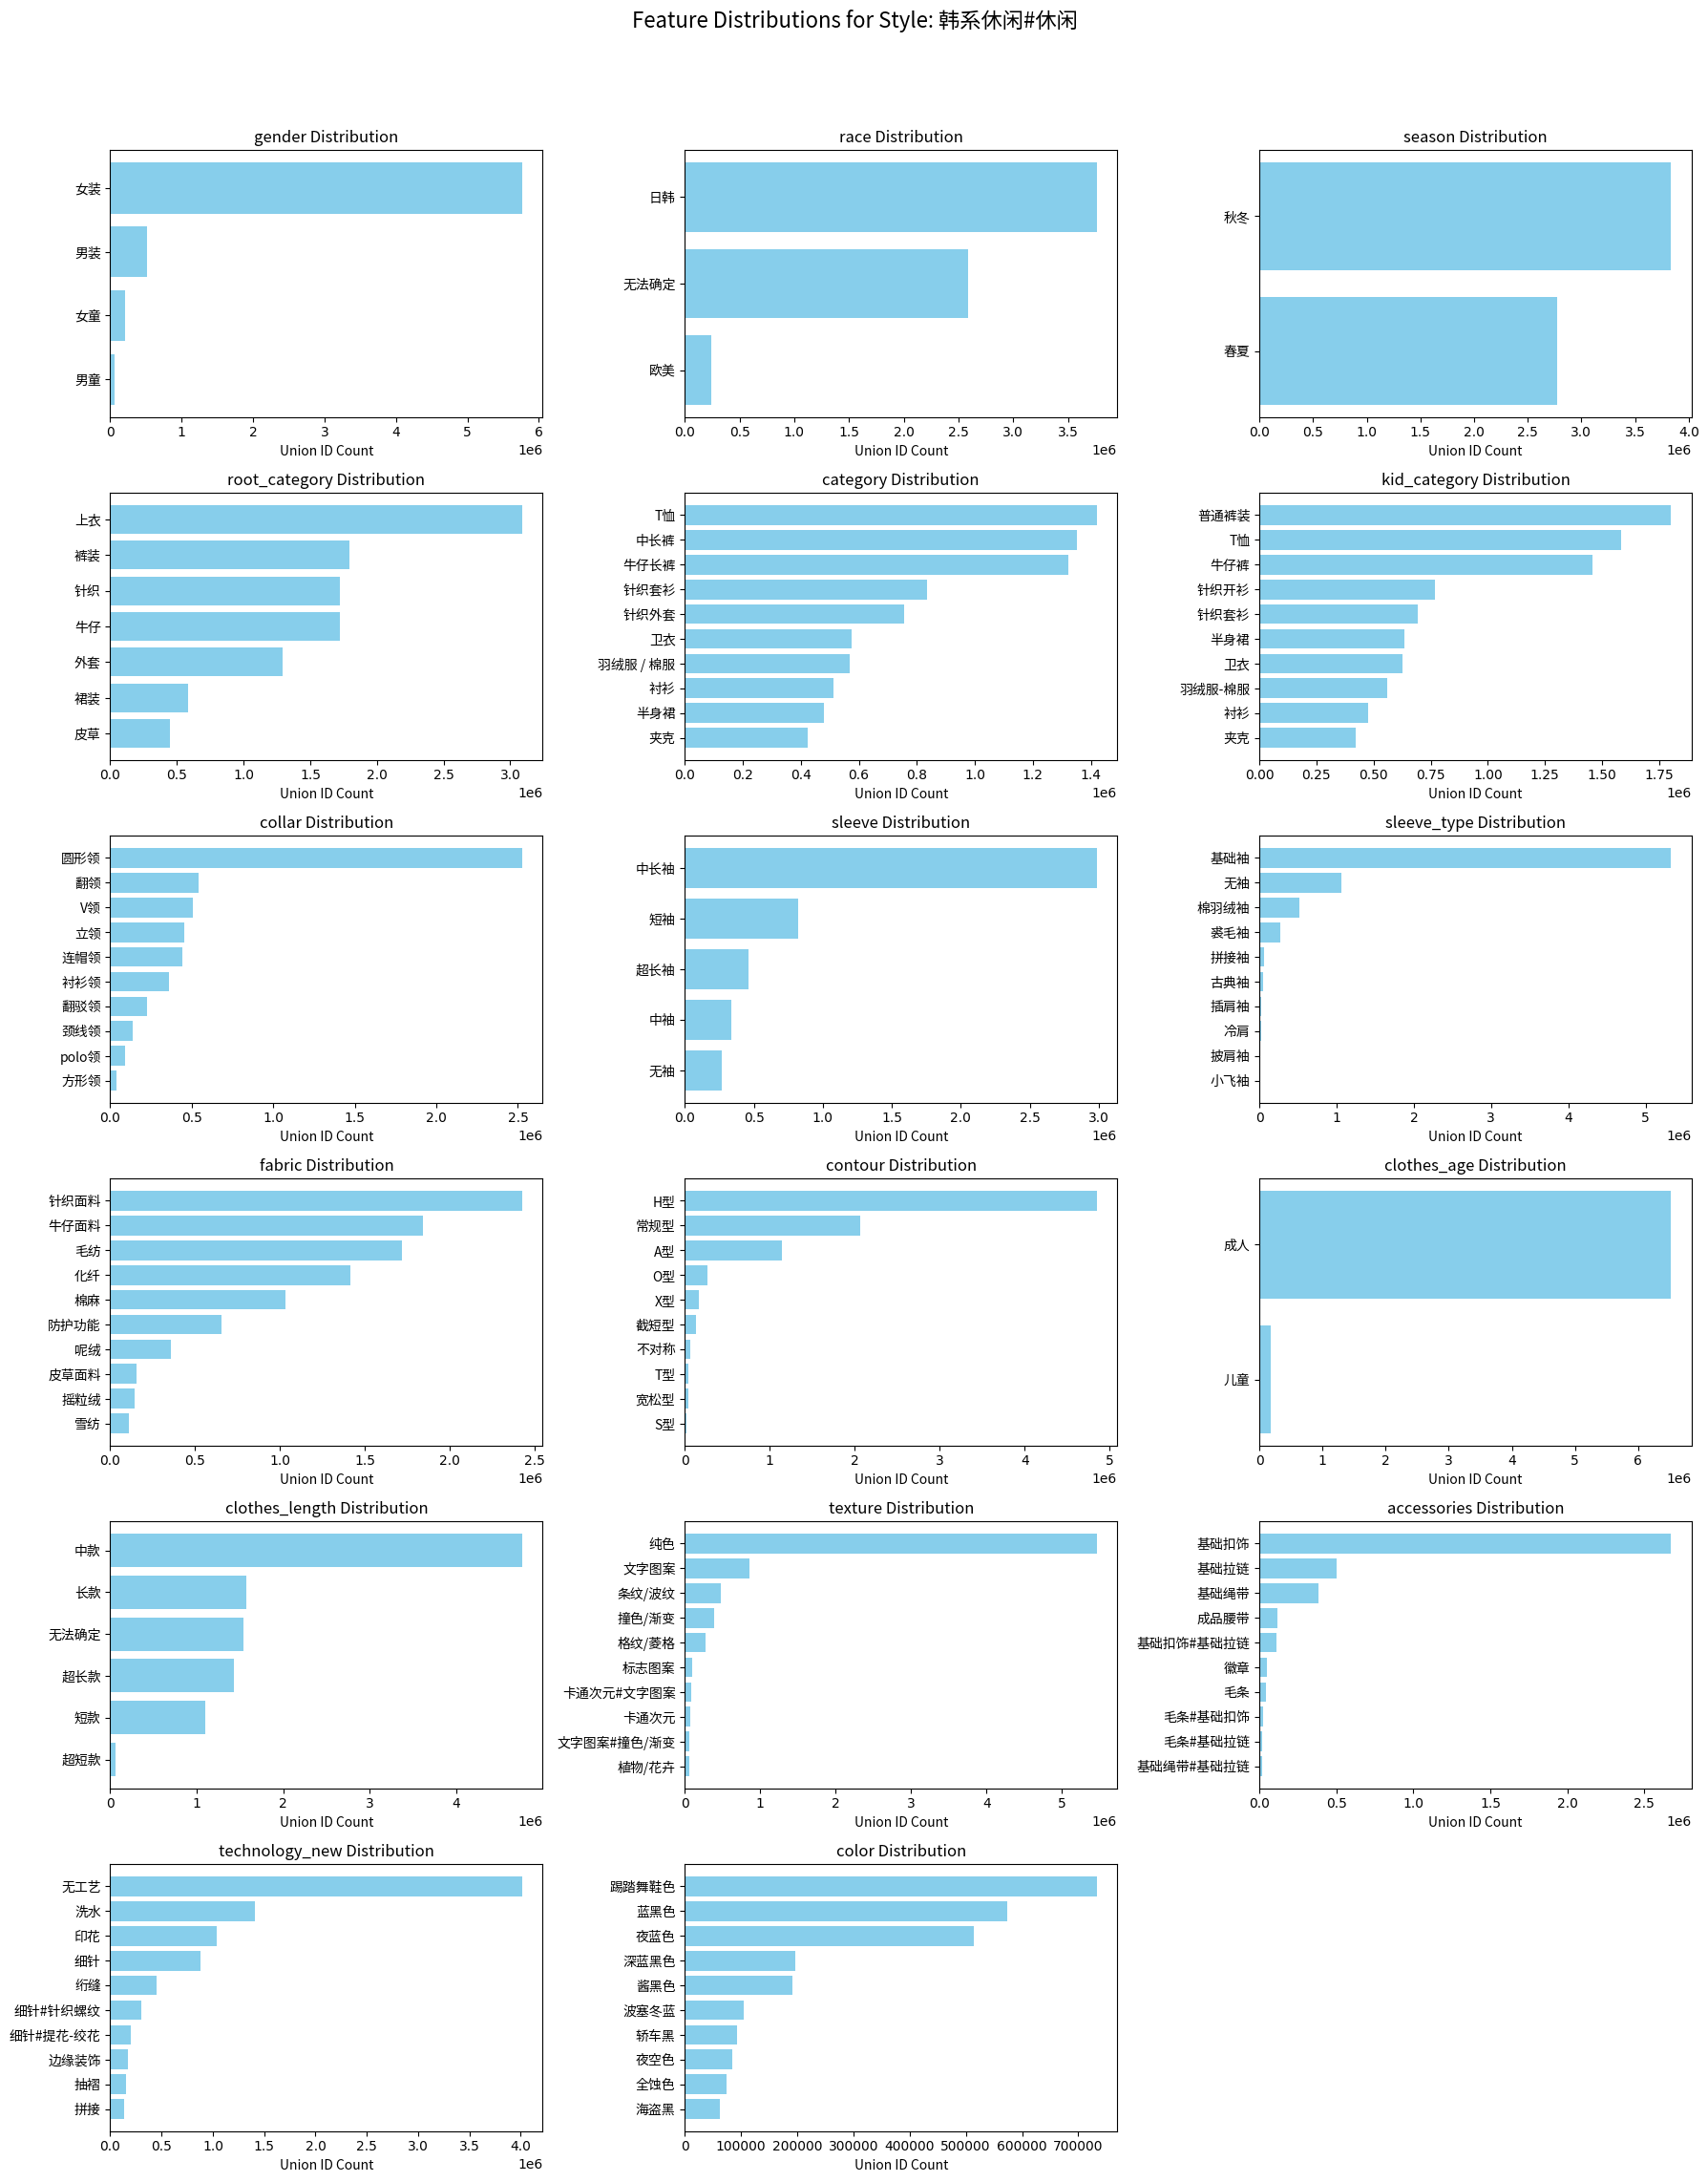


生成 休闲运动#运动 的特征分布图


findfont: Generic family 'sans-serif' not found because none of the following families were found: /usr/share/fonts/opentype/noto/NotoSansCJK-Regular.ttc
findfont: Generic family 'sans-serif' not found because none of the following families were found: /usr/share/fonts/opentype/noto/NotoSansCJK-Regular.ttc
findfont: Generic family 'sans-serif' not found because none of the following families were found: /usr/share/fonts/opentype/noto/NotoSansCJK-Regular.ttc
findfont: Generic family 'sans-serif' not found because none of the following families were found: /usr/share/fonts/opentype/noto/NotoSansCJK-Regular.ttc
findfont: Generic family 'sans-serif' not found because none of the following families were found: /usr/share/fonts/opentype/noto/NotoSansCJK-Regular.ttc
findfont: Generic family 'sans-serif' not found because none of the following families were found: /usr/share/fonts/opentype/noto/NotoSansCJK-Regular.ttc
findfont: Generic family 'sans-serif' not found because none of the followin

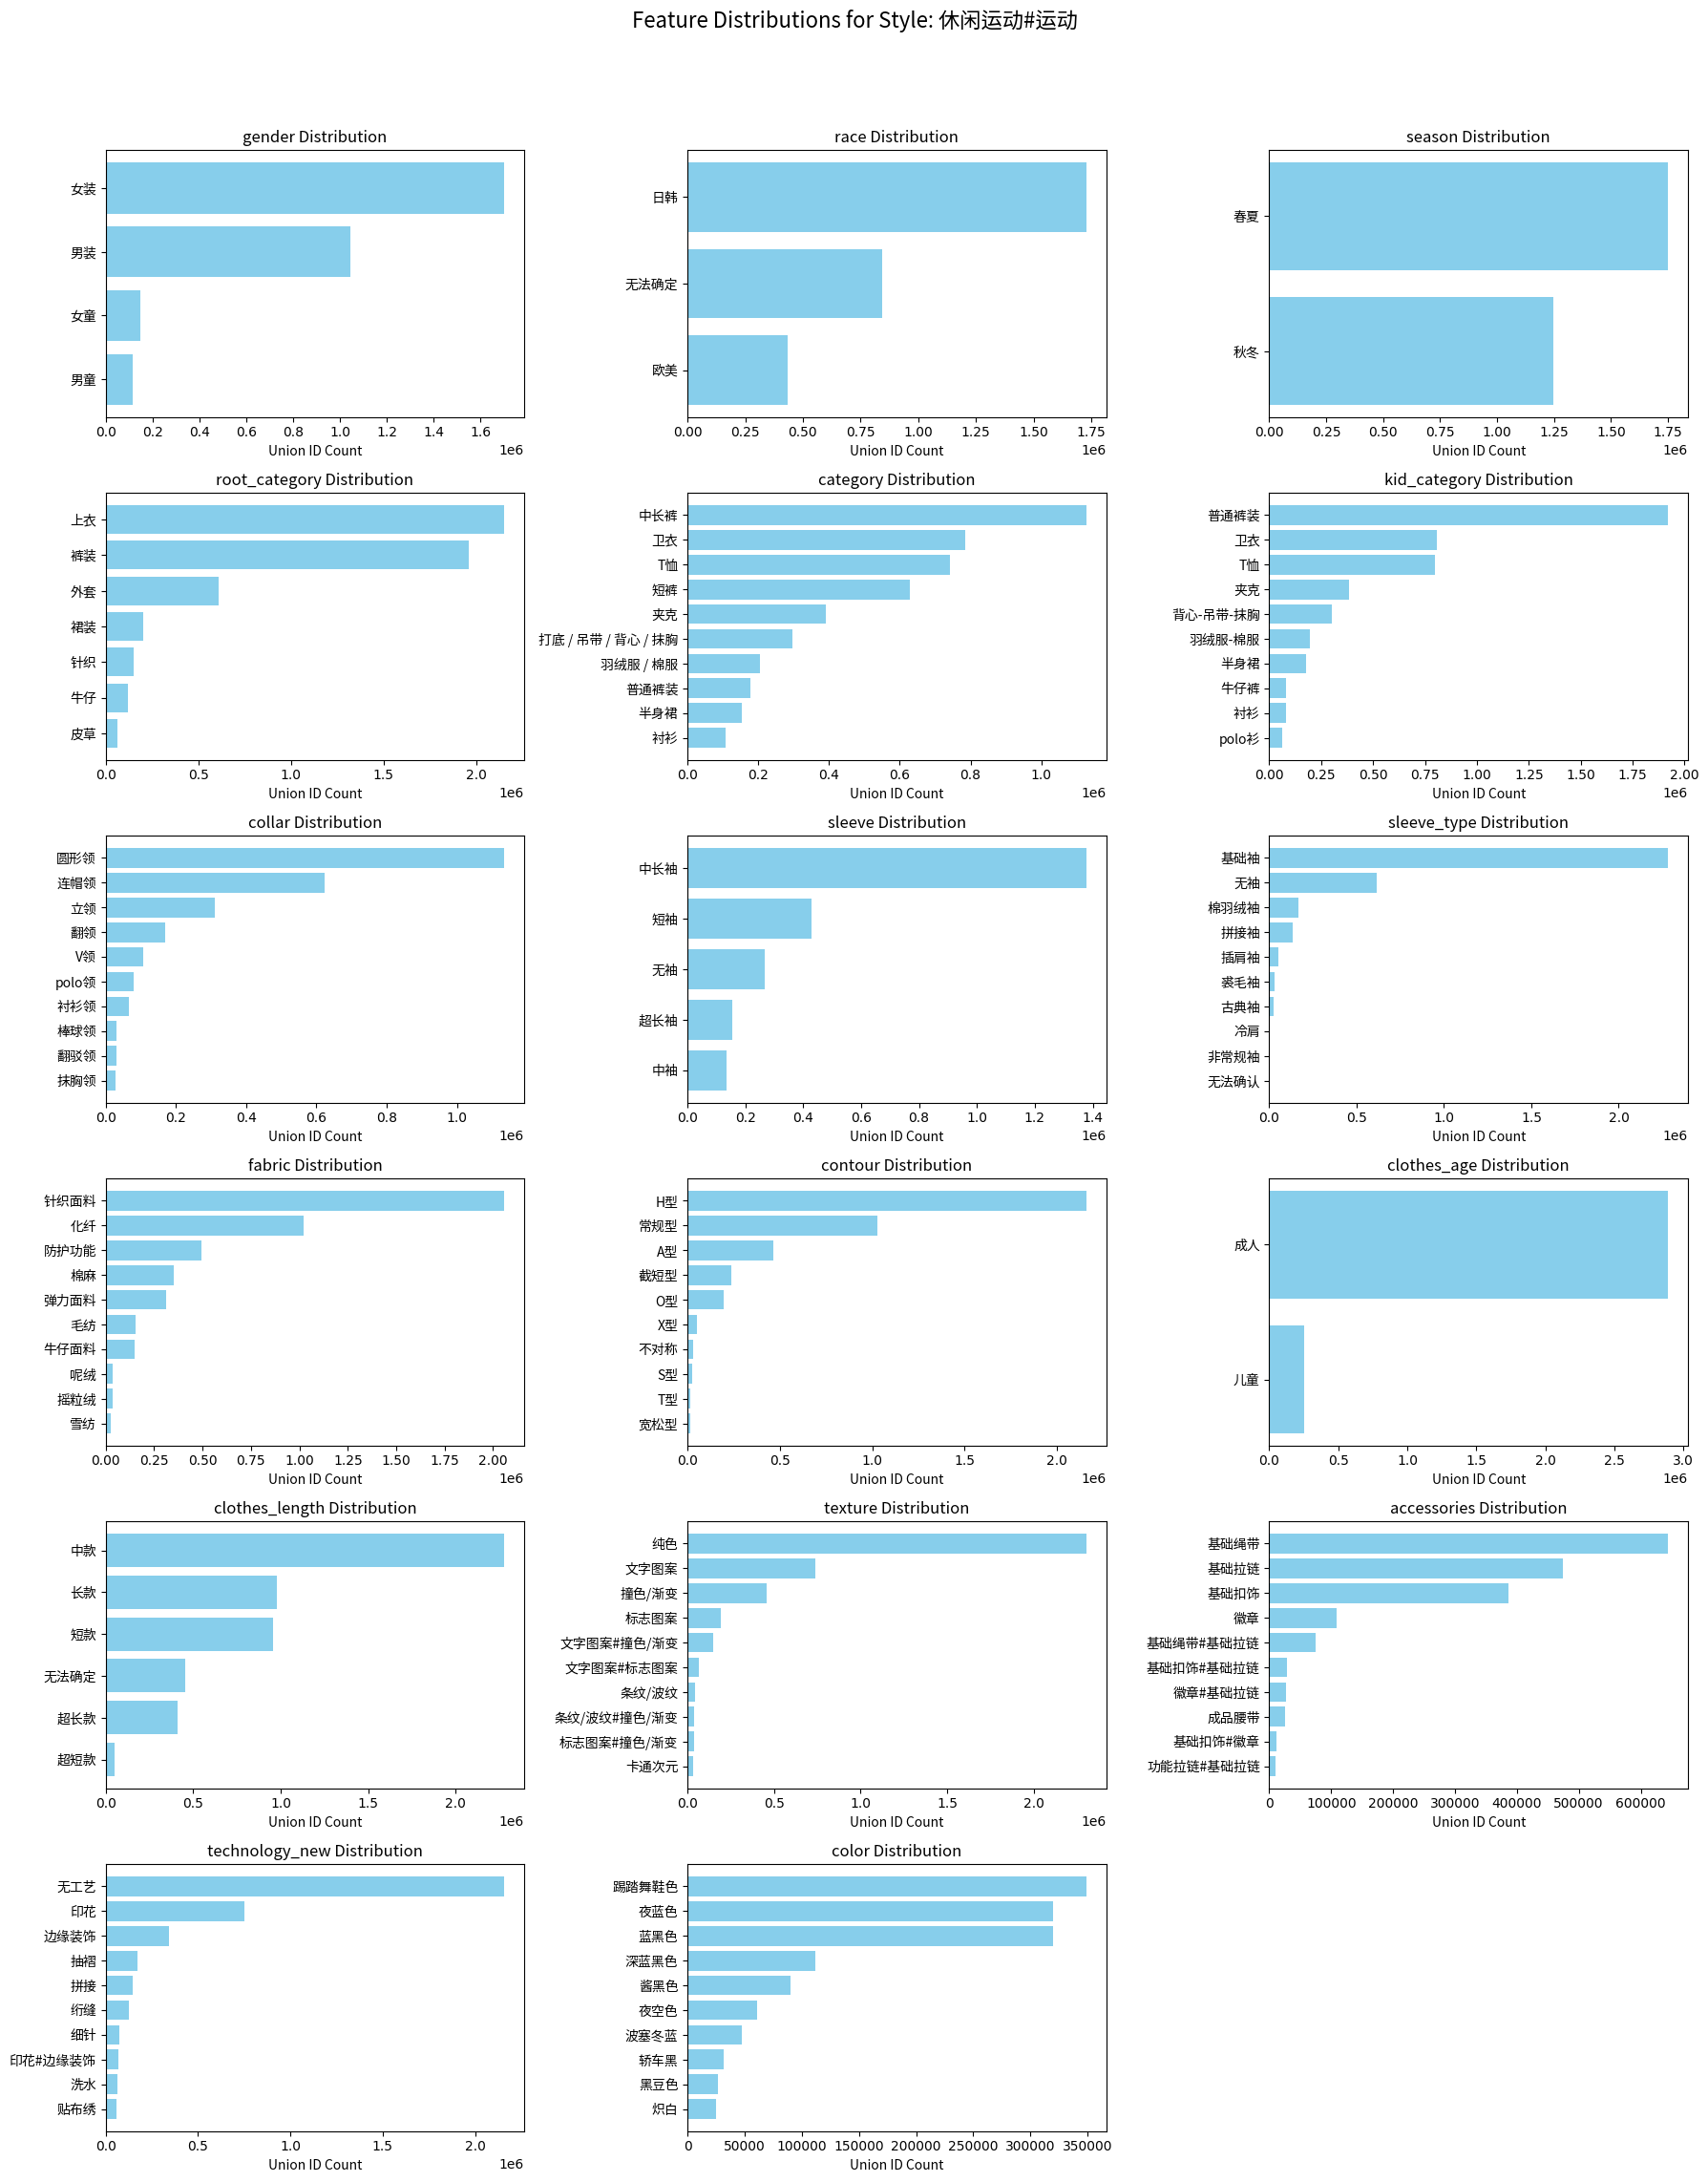


生成 淑女 的特征分布图


findfont: Generic family 'sans-serif' not found because none of the following families were found: /usr/share/fonts/opentype/noto/NotoSansCJK-Regular.ttc
findfont: Generic family 'sans-serif' not found because none of the following families were found: /usr/share/fonts/opentype/noto/NotoSansCJK-Regular.ttc
findfont: Generic family 'sans-serif' not found because none of the following families were found: /usr/share/fonts/opentype/noto/NotoSansCJK-Regular.ttc
findfont: Generic family 'sans-serif' not found because none of the following families were found: /usr/share/fonts/opentype/noto/NotoSansCJK-Regular.ttc
findfont: Generic family 'sans-serif' not found because none of the following families were found: /usr/share/fonts/opentype/noto/NotoSansCJK-Regular.ttc
findfont: Generic family 'sans-serif' not found because none of the following families were found: /usr/share/fonts/opentype/noto/NotoSansCJK-Regular.ttc
findfont: Generic family 'sans-serif' not found because none of the followin

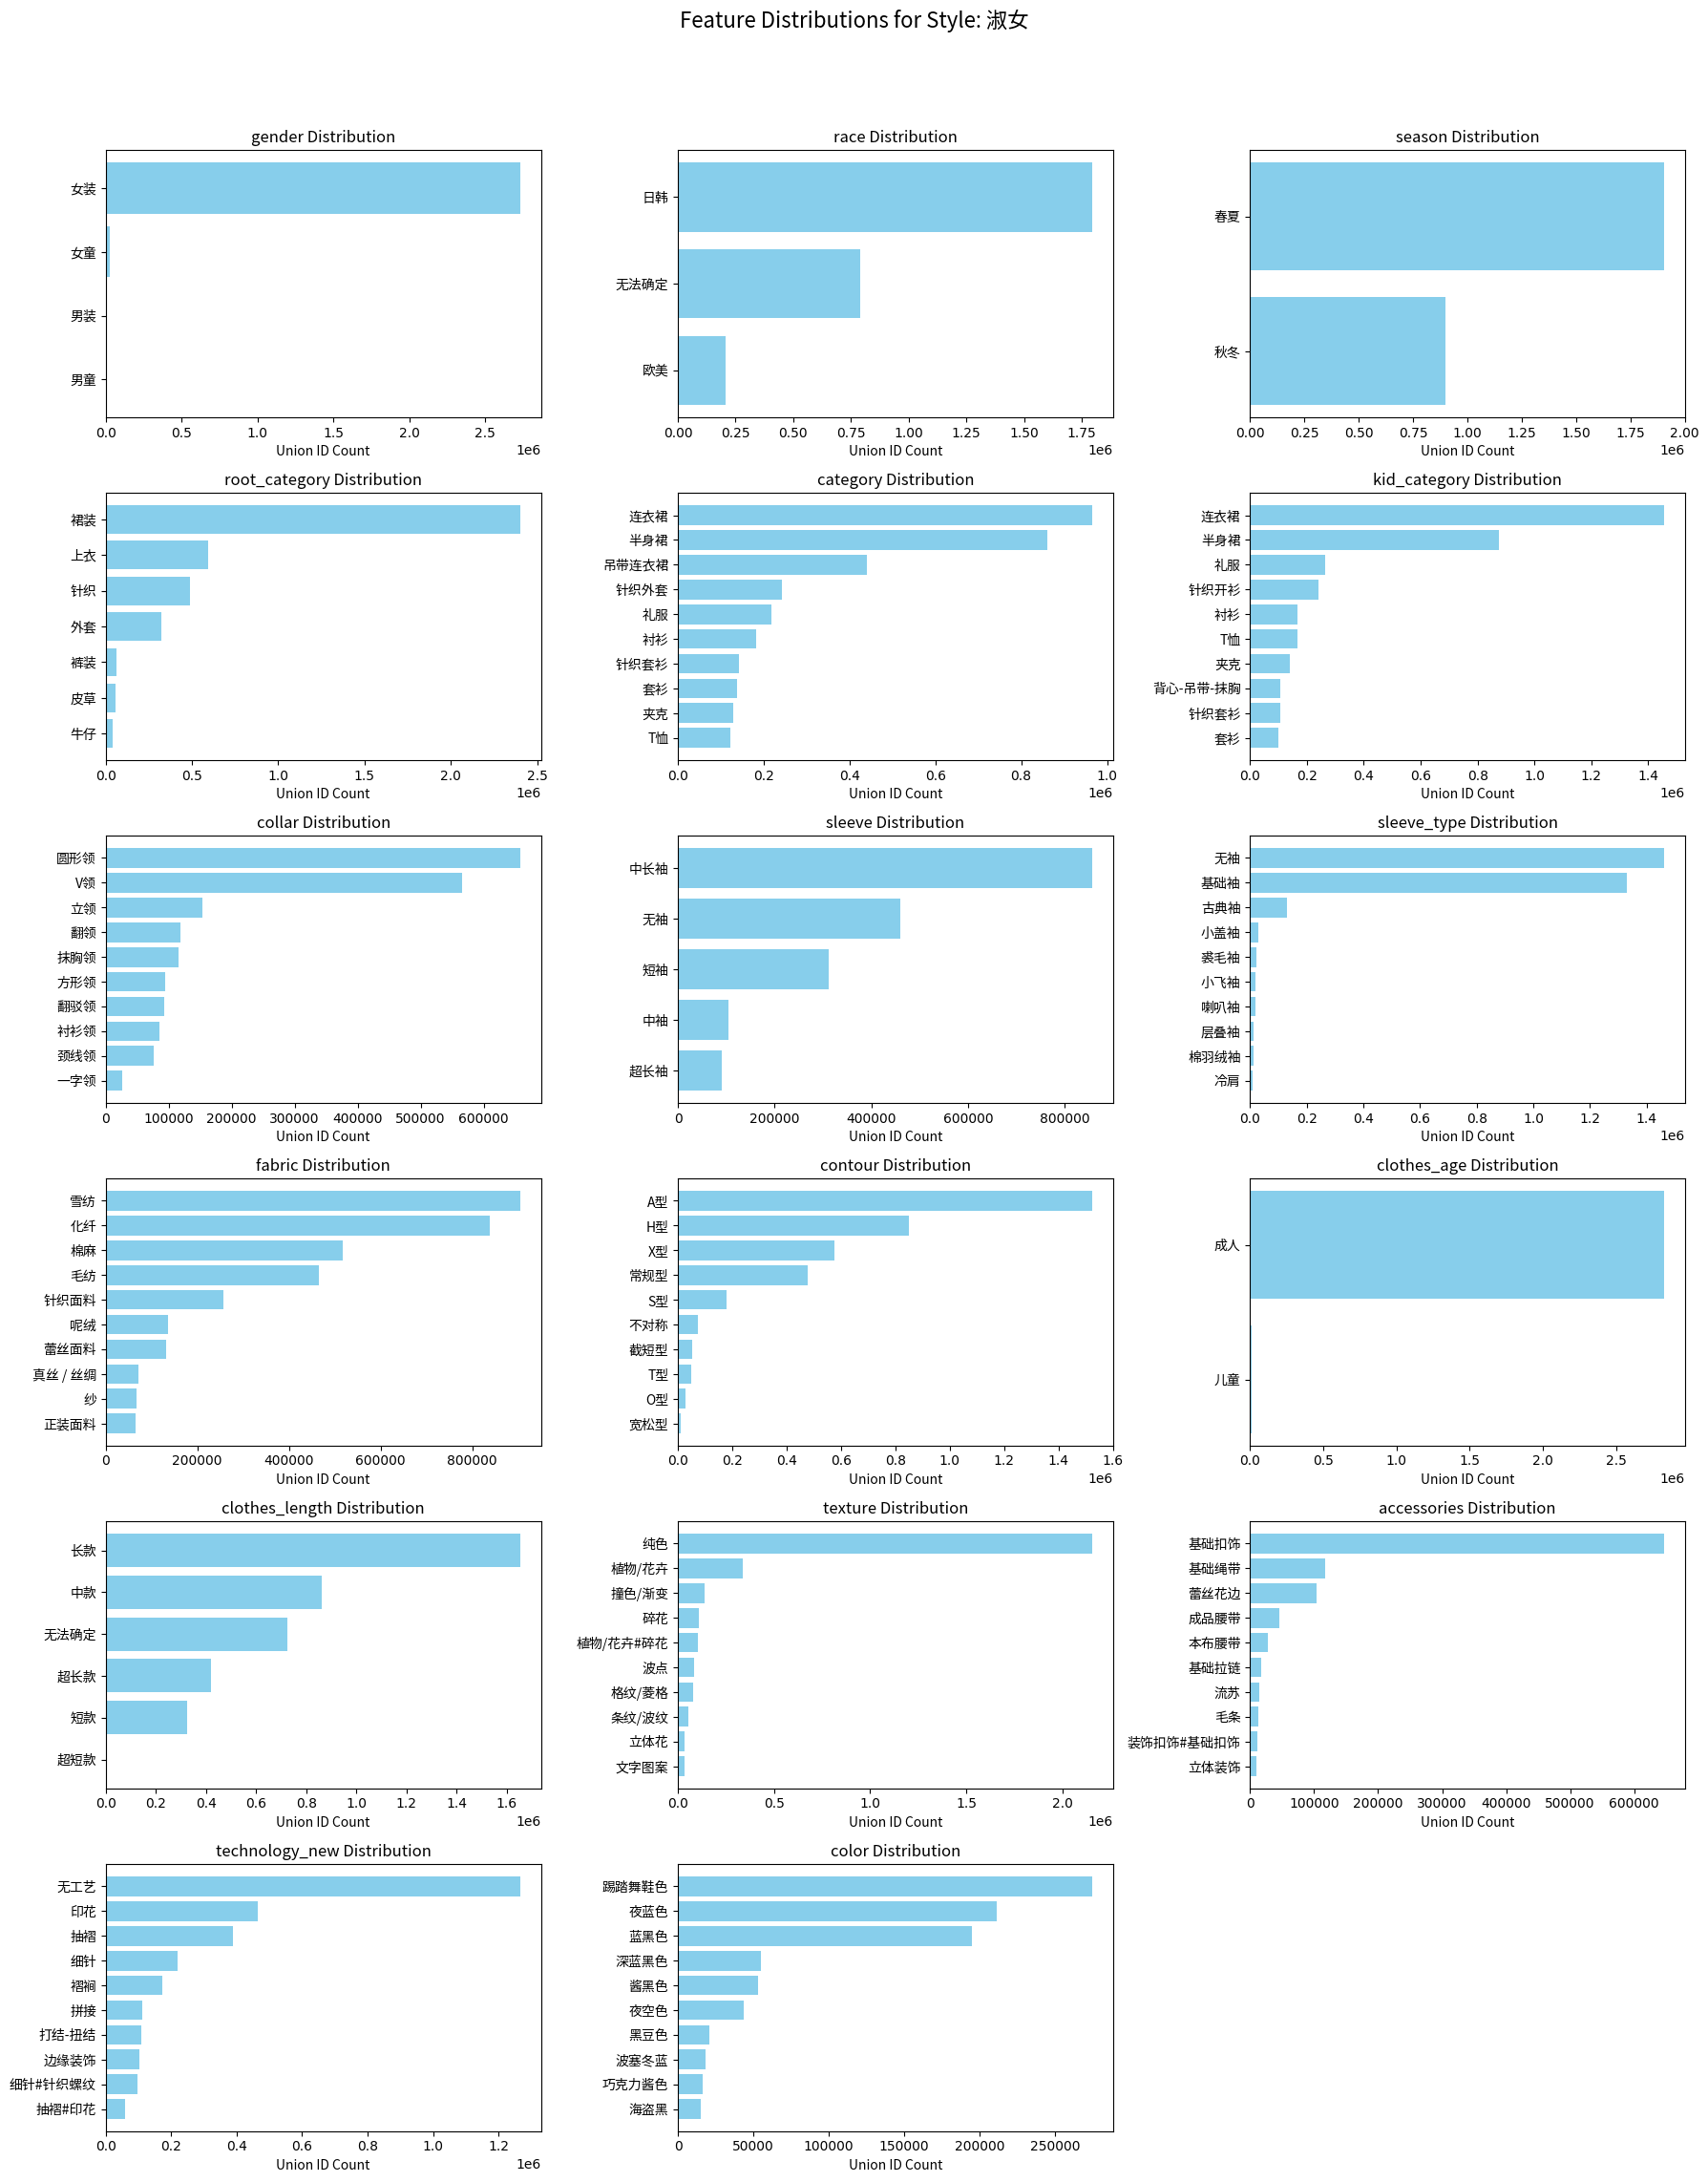


生成 都市休闲#都市 的特征分布图


findfont: Generic family 'sans-serif' not found because none of the following families were found: /usr/share/fonts/opentype/noto/NotoSansCJK-Regular.ttc
findfont: Generic family 'sans-serif' not found because none of the following families were found: /usr/share/fonts/opentype/noto/NotoSansCJK-Regular.ttc
findfont: Generic family 'sans-serif' not found because none of the following families were found: /usr/share/fonts/opentype/noto/NotoSansCJK-Regular.ttc
findfont: Generic family 'sans-serif' not found because none of the following families were found: /usr/share/fonts/opentype/noto/NotoSansCJK-Regular.ttc
findfont: Generic family 'sans-serif' not found because none of the following families were found: /usr/share/fonts/opentype/noto/NotoSansCJK-Regular.ttc
findfont: Generic family 'sans-serif' not found because none of the following families were found: /usr/share/fonts/opentype/noto/NotoSansCJK-Regular.ttc
findfont: Generic family 'sans-serif' not found because none of the followin

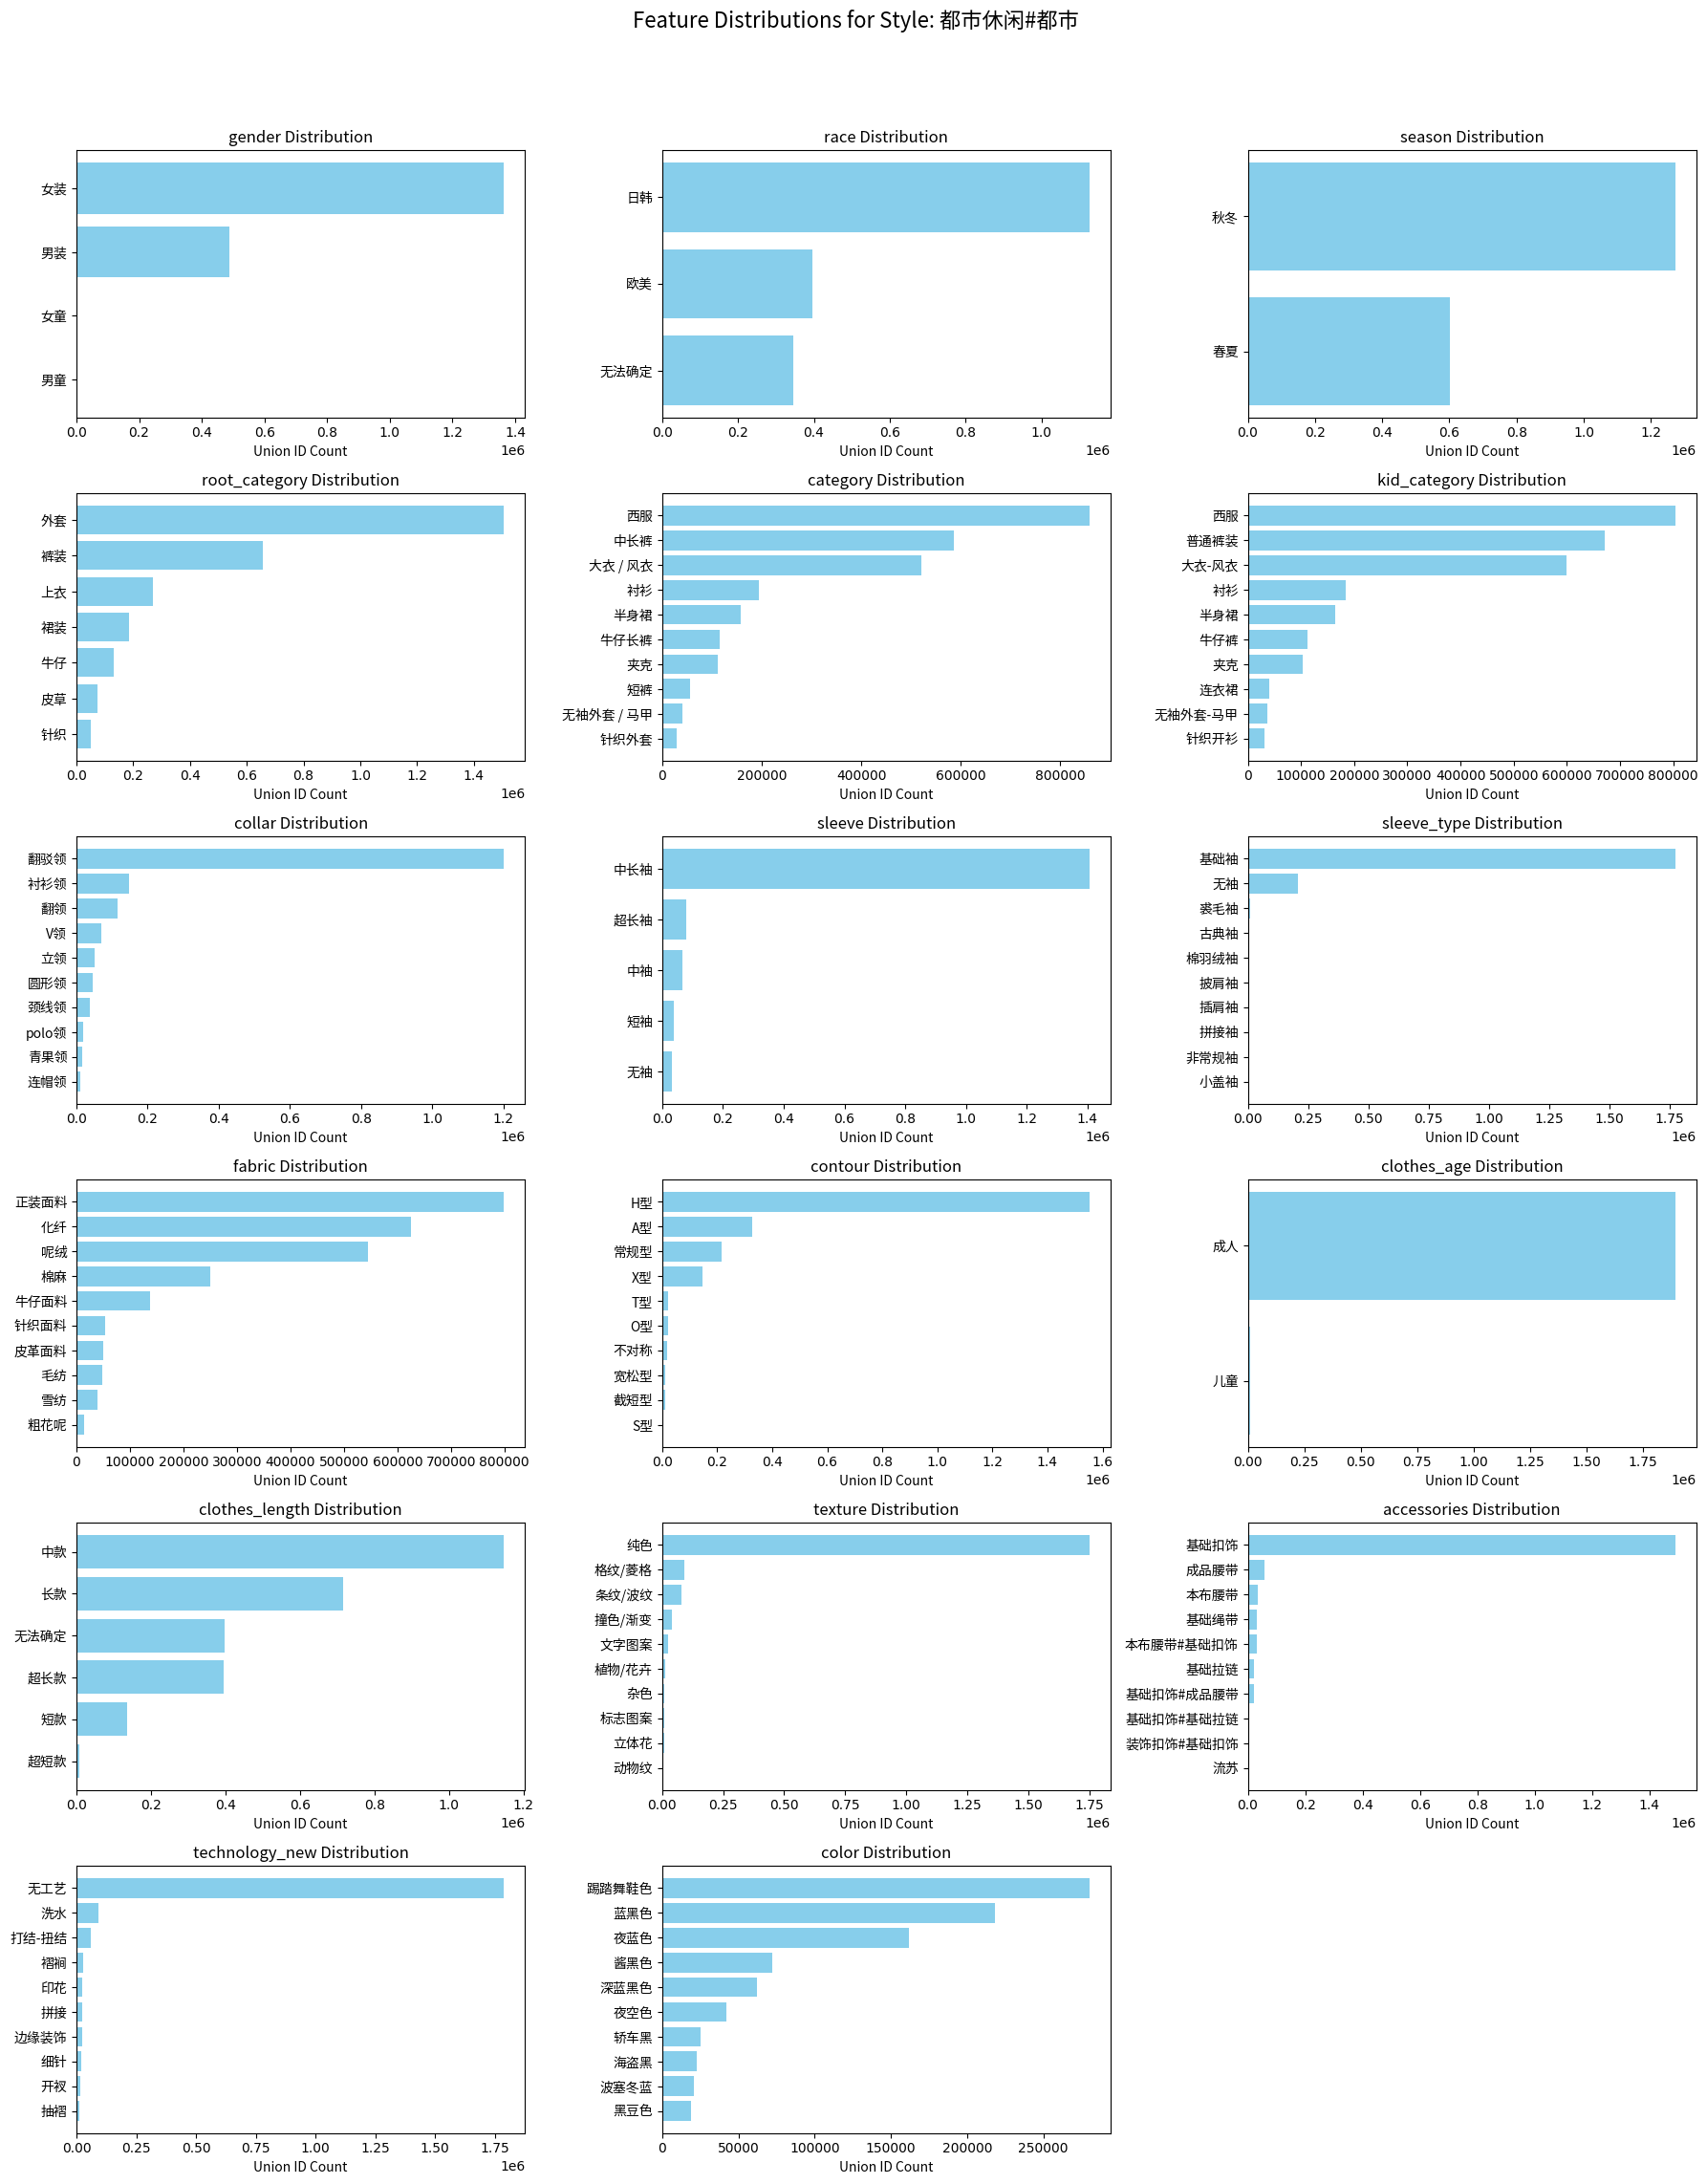


生成 甜美 的特征分布图


findfont: Generic family 'sans-serif' not found because none of the following families were found: /usr/share/fonts/opentype/noto/NotoSansCJK-Regular.ttc
findfont: Generic family 'sans-serif' not found because none of the following families were found: /usr/share/fonts/opentype/noto/NotoSansCJK-Regular.ttc
findfont: Generic family 'sans-serif' not found because none of the following families were found: /usr/share/fonts/opentype/noto/NotoSansCJK-Regular.ttc
findfont: Generic family 'sans-serif' not found because none of the following families were found: /usr/share/fonts/opentype/noto/NotoSansCJK-Regular.ttc
findfont: Generic family 'sans-serif' not found because none of the following families were found: /usr/share/fonts/opentype/noto/NotoSansCJK-Regular.ttc
findfont: Generic family 'sans-serif' not found because none of the following families were found: /usr/share/fonts/opentype/noto/NotoSansCJK-Regular.ttc
findfont: Generic family 'sans-serif' not found because none of the followin

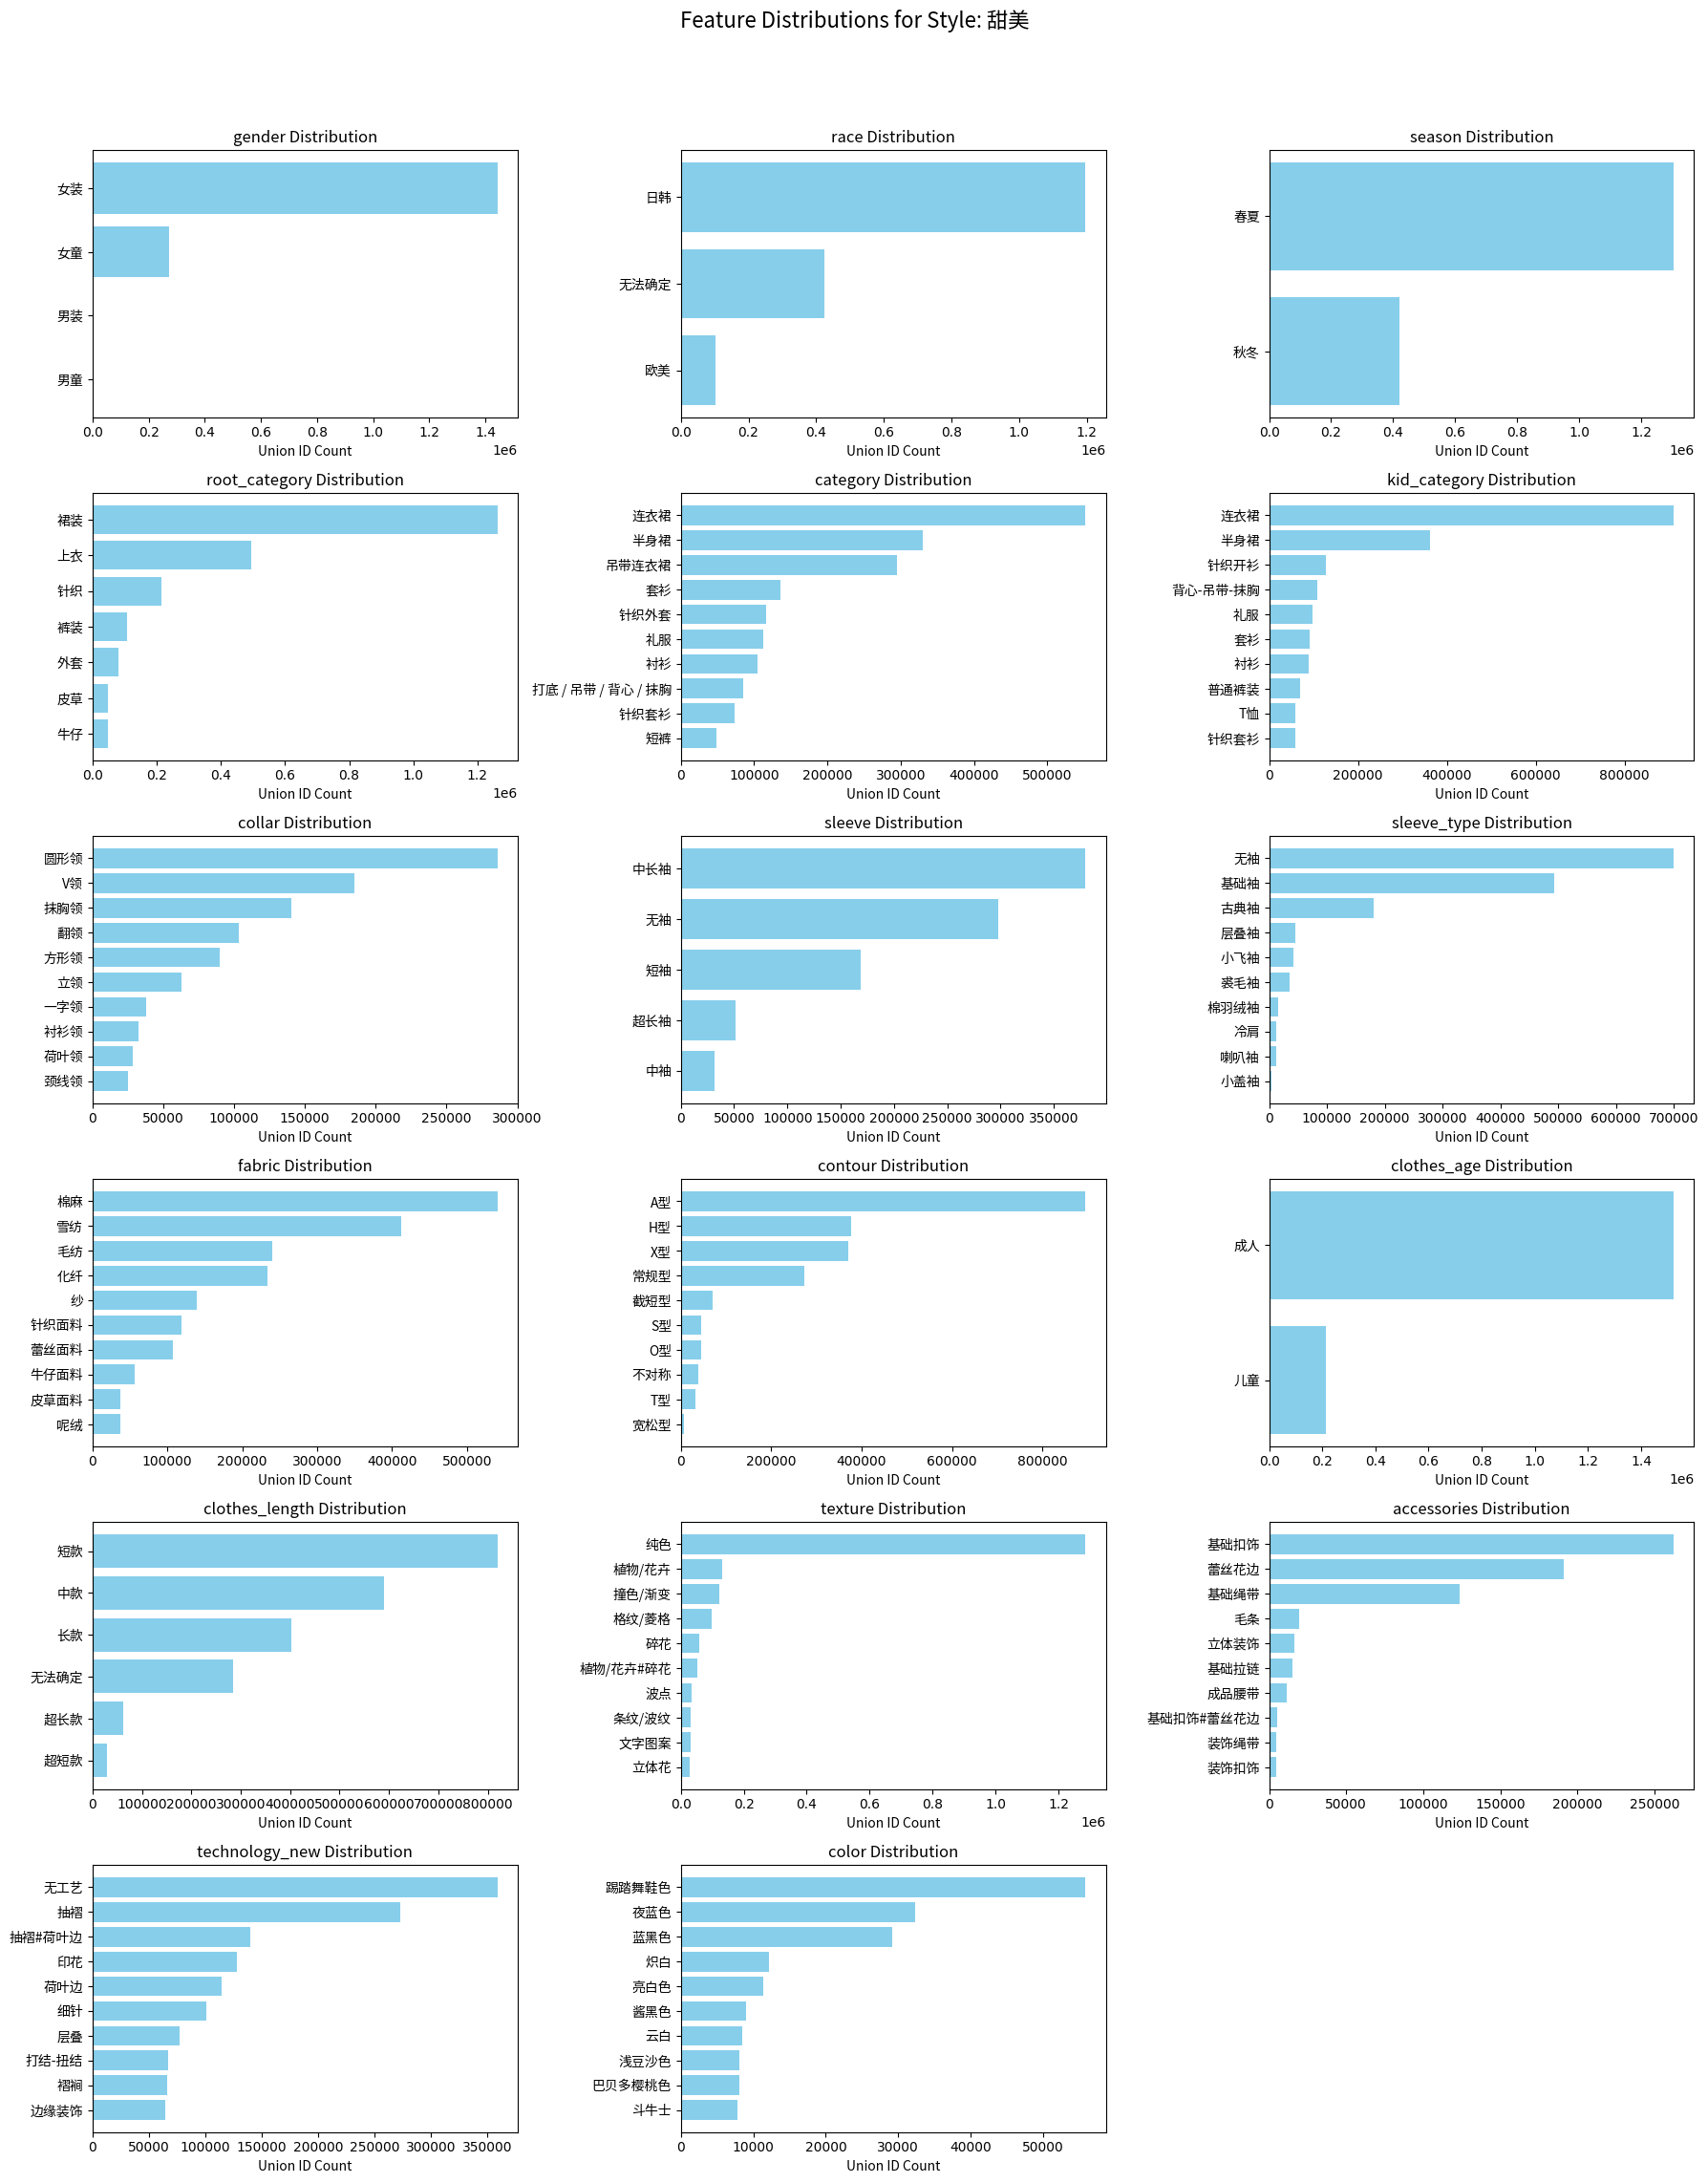

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties

# 加载数据
file_path = '/home/disk1/red_disk1/zhiyi/zhiyi_data/xhs_style_post_cleaned.csv'
data = pd.read_csv(file_path, encoding='utf-8')

# 定义特征列和筛选前5个 style
columns_to_check = [
    'gender', 'race', 'season', 'root_category', 'category', 'kid_category', 
    'collar', 'sleeve', 'sleeve_type', 'fabric', 'contour', 'clothes_age', 
    'clothes_length', 'texture', 'accessories', 'technology_new', 'color'
]
top_5_styles = data.groupby('style_new')['union_id'].nunique().nlargest(5).index
top_5_data = data[data['style_new'].isin(top_5_styles)]

# 加载中文字体
chinese_font = FontProperties(fname='/usr/share/fonts/opentype/noto/NotoSansCJK-Regular.ttc')

# 为每个 style 生成子图
for style in top_5_styles:
    style_data = top_5_data[top_5_data['style_new'] == style]
    print(f"\n生成 {style} 的特征分布图")
    
    # 设置子图布局：每行 3 个图，最后一行 2 个图
    fig, axes = plt.subplots(6, 3, figsize=(18, 24))  # 总共 17 个特征
    fig.suptitle(f'Feature Distributions for Style: {style}', fontproperties=chinese_font, fontsize=16)
    axes = axes.flatten()

    for i, col in enumerate(columns_to_check):
        # 计算每个特征的 union_id 分布，按计数降序排列
        feature_distribution = style_data.groupby(col)['union_id'].nunique().nlargest(10)
        
        # 按计数降序排列绘制横向条形图，使多数类别在顶部
        axes[i].barh(feature_distribution.index[::-1], feature_distribution.values[::-1], color='skyblue')
        axes[i].set_title(f'{col} Distribution', fontproperties=chinese_font, fontsize=12)
        axes[i].set_xlabel('Union ID Count', fontproperties=chinese_font)
        axes[i].tick_params(axis='y', labelsize=10)
        
        # 设置 y 轴标签字体为中文字体
        for label in axes[i].get_yticklabels():
            label.set_fontproperties(chinese_font)

    # 移除多余的空白子图
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    # 布局调整并显示图表
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # 留出顶部标题的空间
    plt.show()


#### Check the trend

findfont: Generic family 'sans-serif' not found because none of the following families were found: /usr/share/fonts/opentype/noto/NotoSansCJK-Regular.ttc
findfont: Generic family 'sans-serif' not found because none of the following families were found: /usr/share/fonts/opentype/noto/NotoSansCJK-Regular.ttc
findfont: Generic family 'sans-serif' not found because none of the following families were found: /usr/share/fonts/opentype/noto/NotoSansCJK-Regular.ttc
findfont: Generic family 'sans-serif' not found because none of the following families were found: /usr/share/fonts/opentype/noto/NotoSansCJK-Regular.ttc
findfont: Generic family 'sans-serif' not found because none of the following families were found: /usr/share/fonts/opentype/noto/NotoSansCJK-Regular.ttc
findfont: Generic family 'sans-serif' not found because none of the following families were found: /usr/share/fonts/opentype/noto/NotoSansCJK-Regular.ttc
findfont: Generic family 'sans-serif' not found because none of the followin

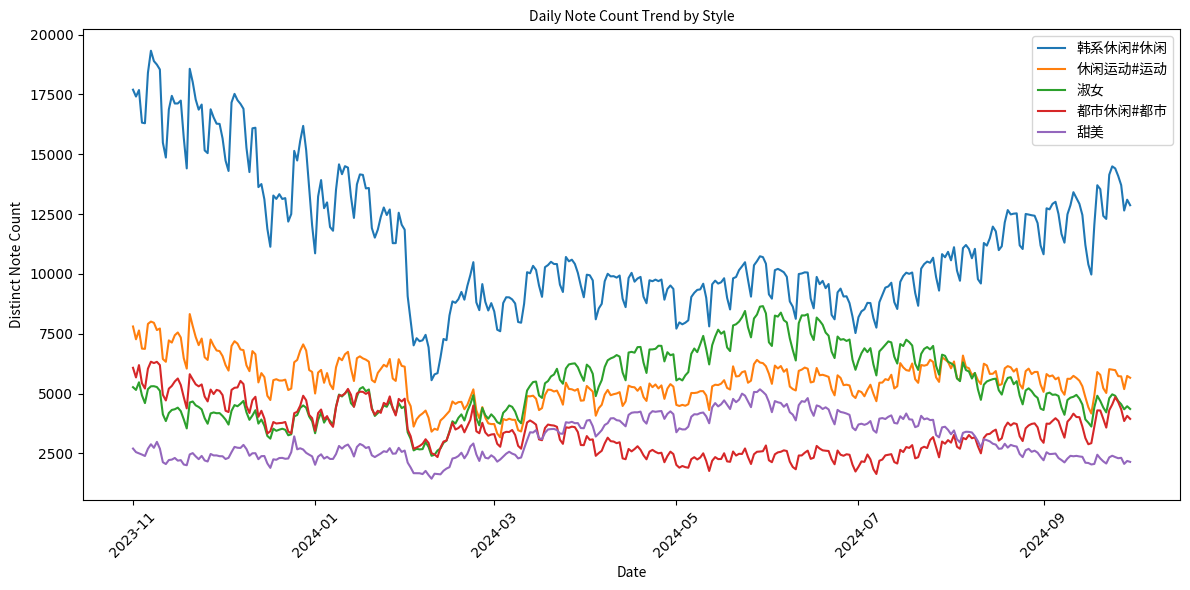

findfont: Generic family 'sans-serif' not found because none of the following families were found: /usr/share/fonts/opentype/noto/NotoSansCJK-Regular.ttc
findfont: Generic family 'sans-serif' not found because none of the following families were found: /usr/share/fonts/opentype/noto/NotoSansCJK-Regular.ttc
findfont: Generic family 'sans-serif' not found because none of the following families were found: /usr/share/fonts/opentype/noto/NotoSansCJK-Regular.ttc
findfont: Generic family 'sans-serif' not found because none of the following families were found: /usr/share/fonts/opentype/noto/NotoSansCJK-Regular.ttc
findfont: Generic family 'sans-serif' not found because none of the following families were found: /usr/share/fonts/opentype/noto/NotoSansCJK-Regular.ttc
findfont: Generic family 'sans-serif' not found because none of the following families were found: /usr/share/fonts/opentype/noto/NotoSansCJK-Regular.ttc
findfont: Generic family 'sans-serif' not found because none of the followin

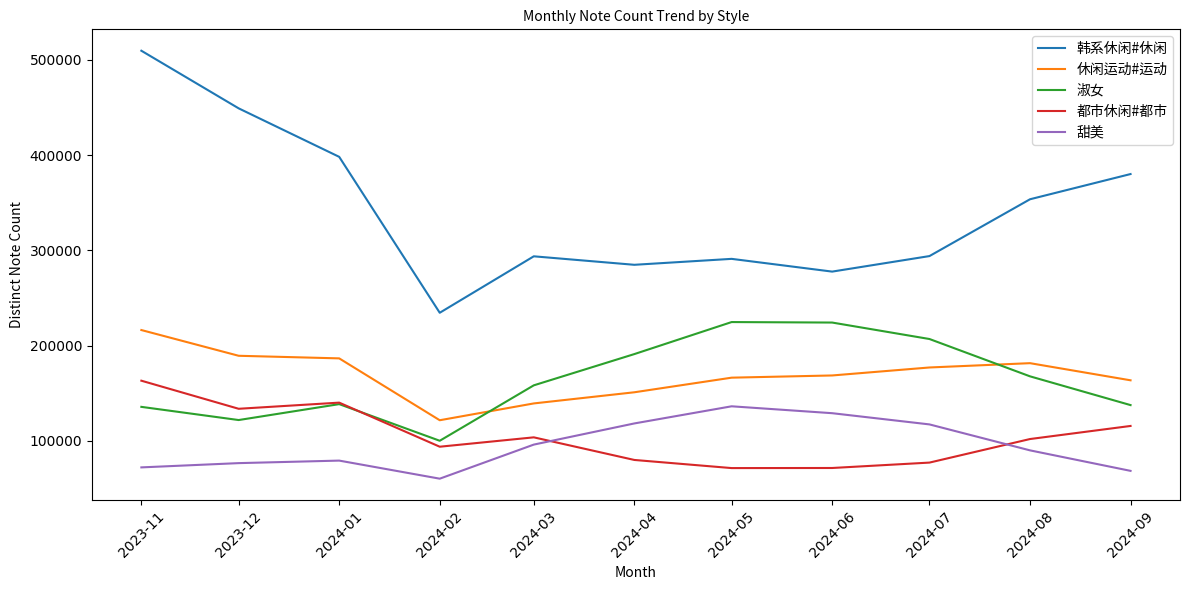

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties

# Load data
file_path = '/home/disk1/red_disk1/zhiyi/zhiyi_data/xhs_style_post_cleaned.csv'
data = pd.read_csv(file_path, encoding='utf-8')

# Convert 'publish_time' to datetime format and extract day and month
data['publish_time'] = pd.to_datetime(data['publish_time'], errors='coerce')
data['publish_day'] = data['publish_time'].dt.date
data['publish_month'] = data['publish_time'].dt.to_period('M')

# Count distinct note_id by day and month, grouped by style
daily_counts = data.groupby(['style_new', 'publish_day'])['note_id'].nunique().reset_index(name='daily_note_count')
monthly_counts = data.groupby(['style_new', 'publish_month'])['note_id'].nunique().reset_index(name='monthly_note_count')

# Find the top 5 styles based on total distinct note_id count
top_5_styles = data.groupby('style_new')['note_id'].nunique().nlargest(5).index

# Filter data for top 5 styles only
daily_counts = daily_counts[daily_counts['style_new'].isin(top_5_styles)]
monthly_counts = monthly_counts[monthly_counts['style_new'].isin(top_5_styles)]

# Load Chinese font
chinese_font = FontProperties(fname='/usr/share/fonts/opentype/noto/NotoSansCJK-Regular.ttc')

# Plot daily trend for each top 5 style
plt.figure(figsize=(12, 6))
for style in top_5_styles:
    style_data = daily_counts[daily_counts['style_new'] == style]
    plt.plot(style_data['publish_day'], style_data['daily_note_count'], label=style)

plt.title('Daily Note Count Trend by Style', fontproperties=chinese_font)
plt.xlabel('Date', fontproperties=chinese_font)
plt.ylabel('Distinct Note Count', fontproperties=chinese_font)
plt.legend(prop=chinese_font)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot monthly trend for each top 5 style
plt.figure(figsize=(12, 6))
for style in top_5_styles:
    style_data = monthly_counts[monthly_counts['style_new'] == style]
    plt.plot(style_data['publish_month'].dt.to_timestamp(), style_data['monthly_note_count'], label=style)

plt.title('Monthly Note Count Trend by Style', fontproperties=chinese_font)
plt.xlabel('Month', fontproperties=chinese_font)
plt.ylabel('Distinct Note Count', fontproperties=chinese_font)
plt.legend(prop=chinese_font)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


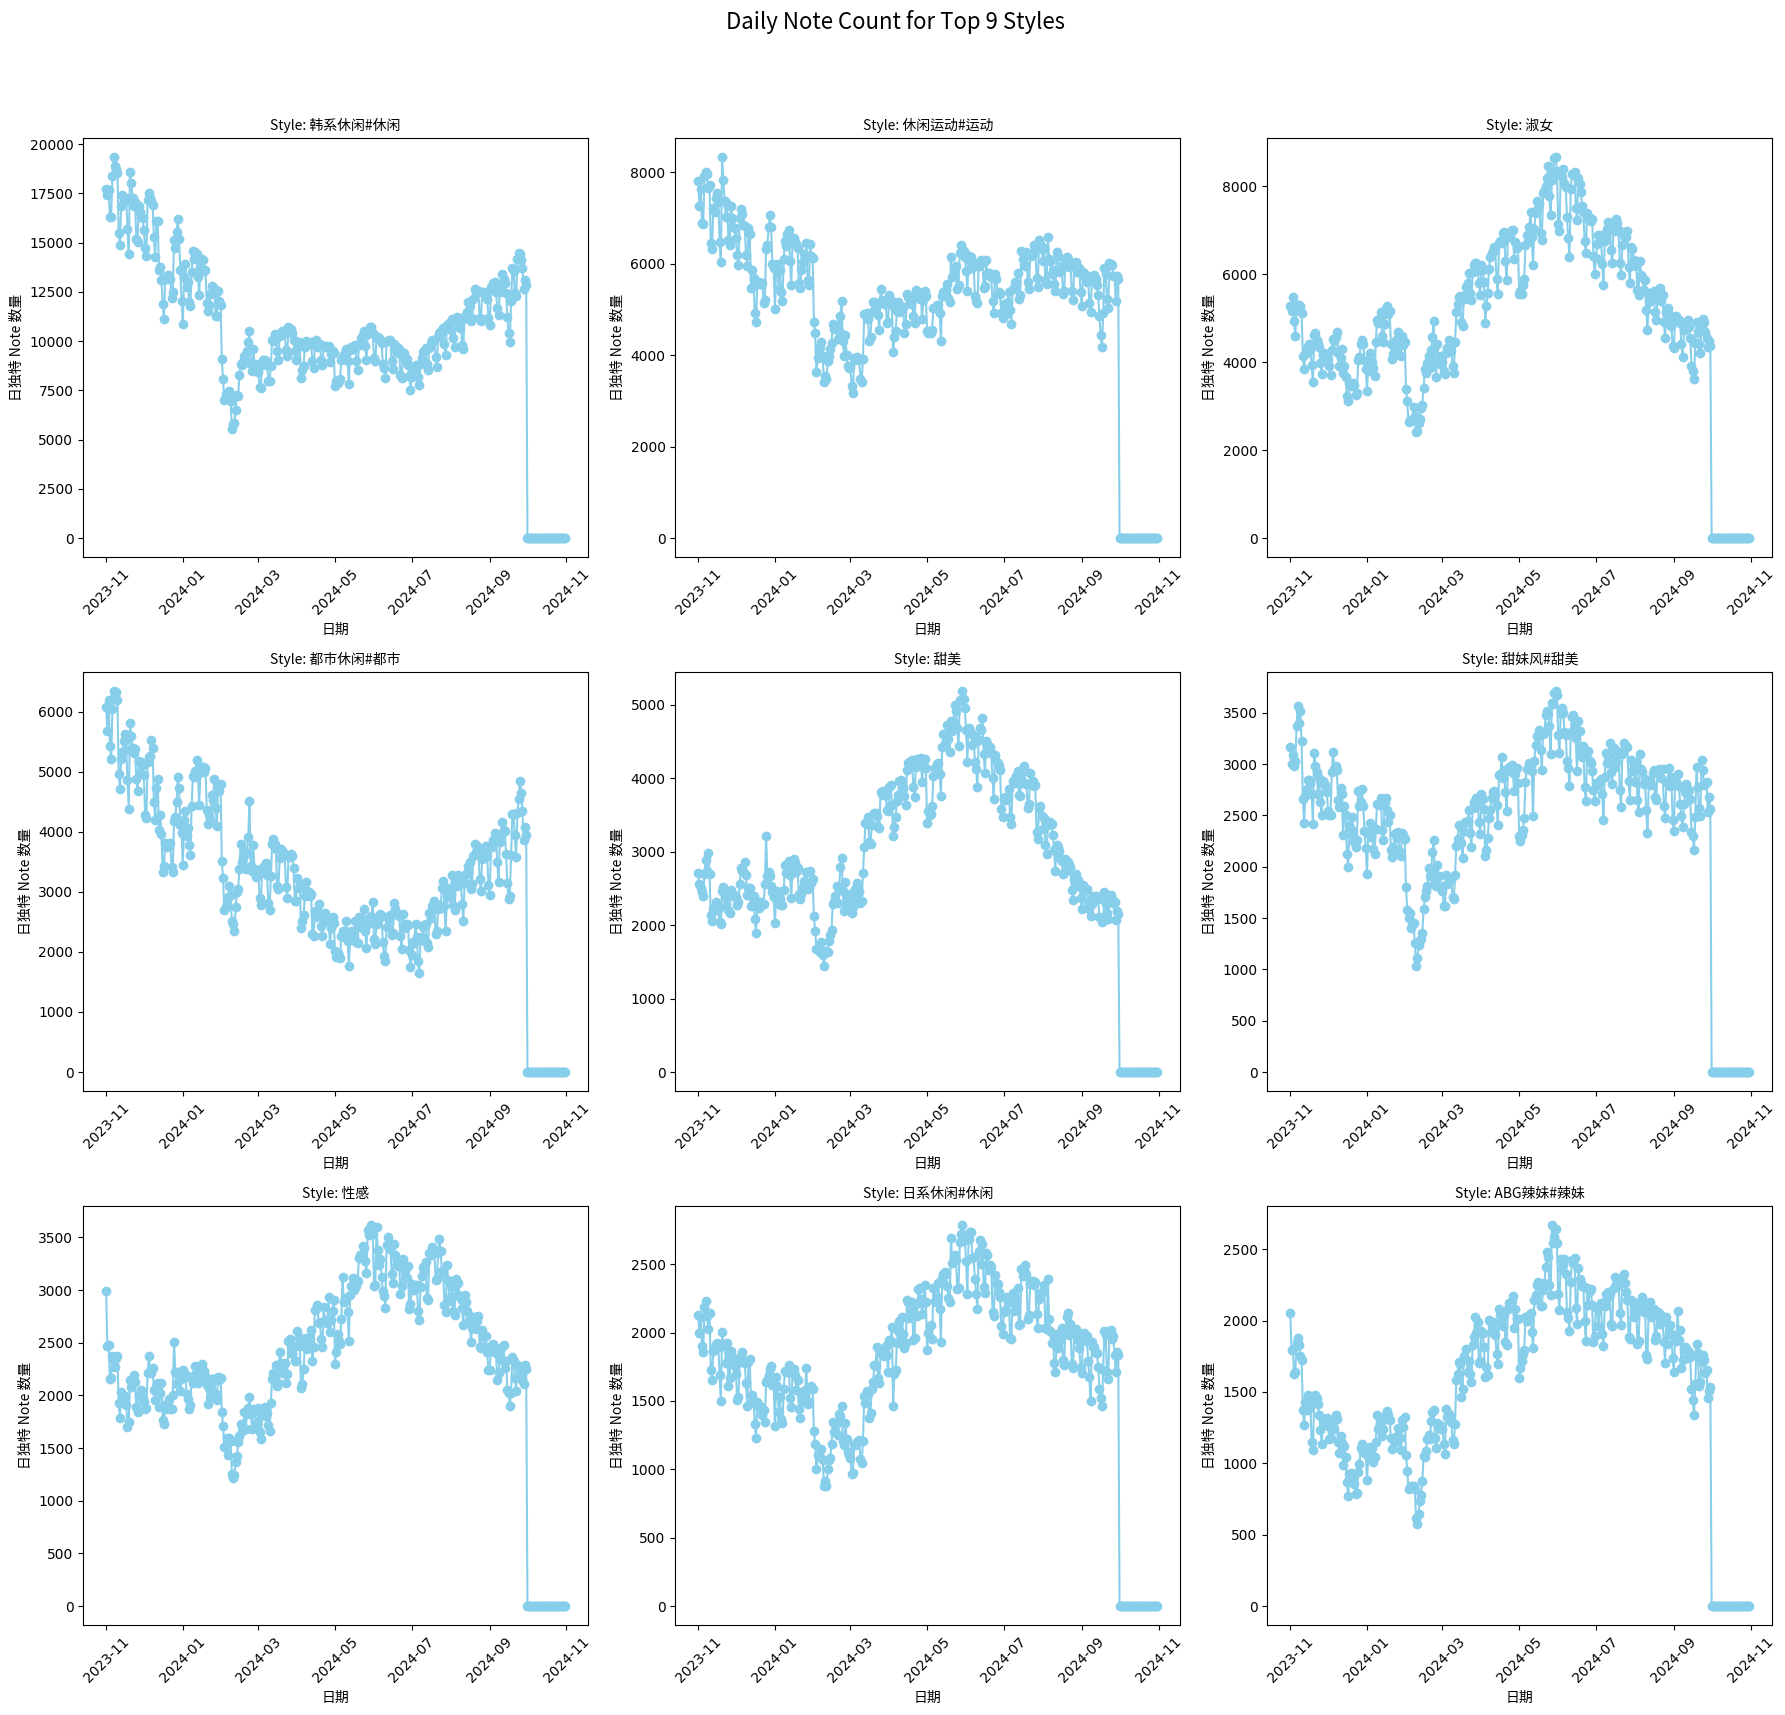

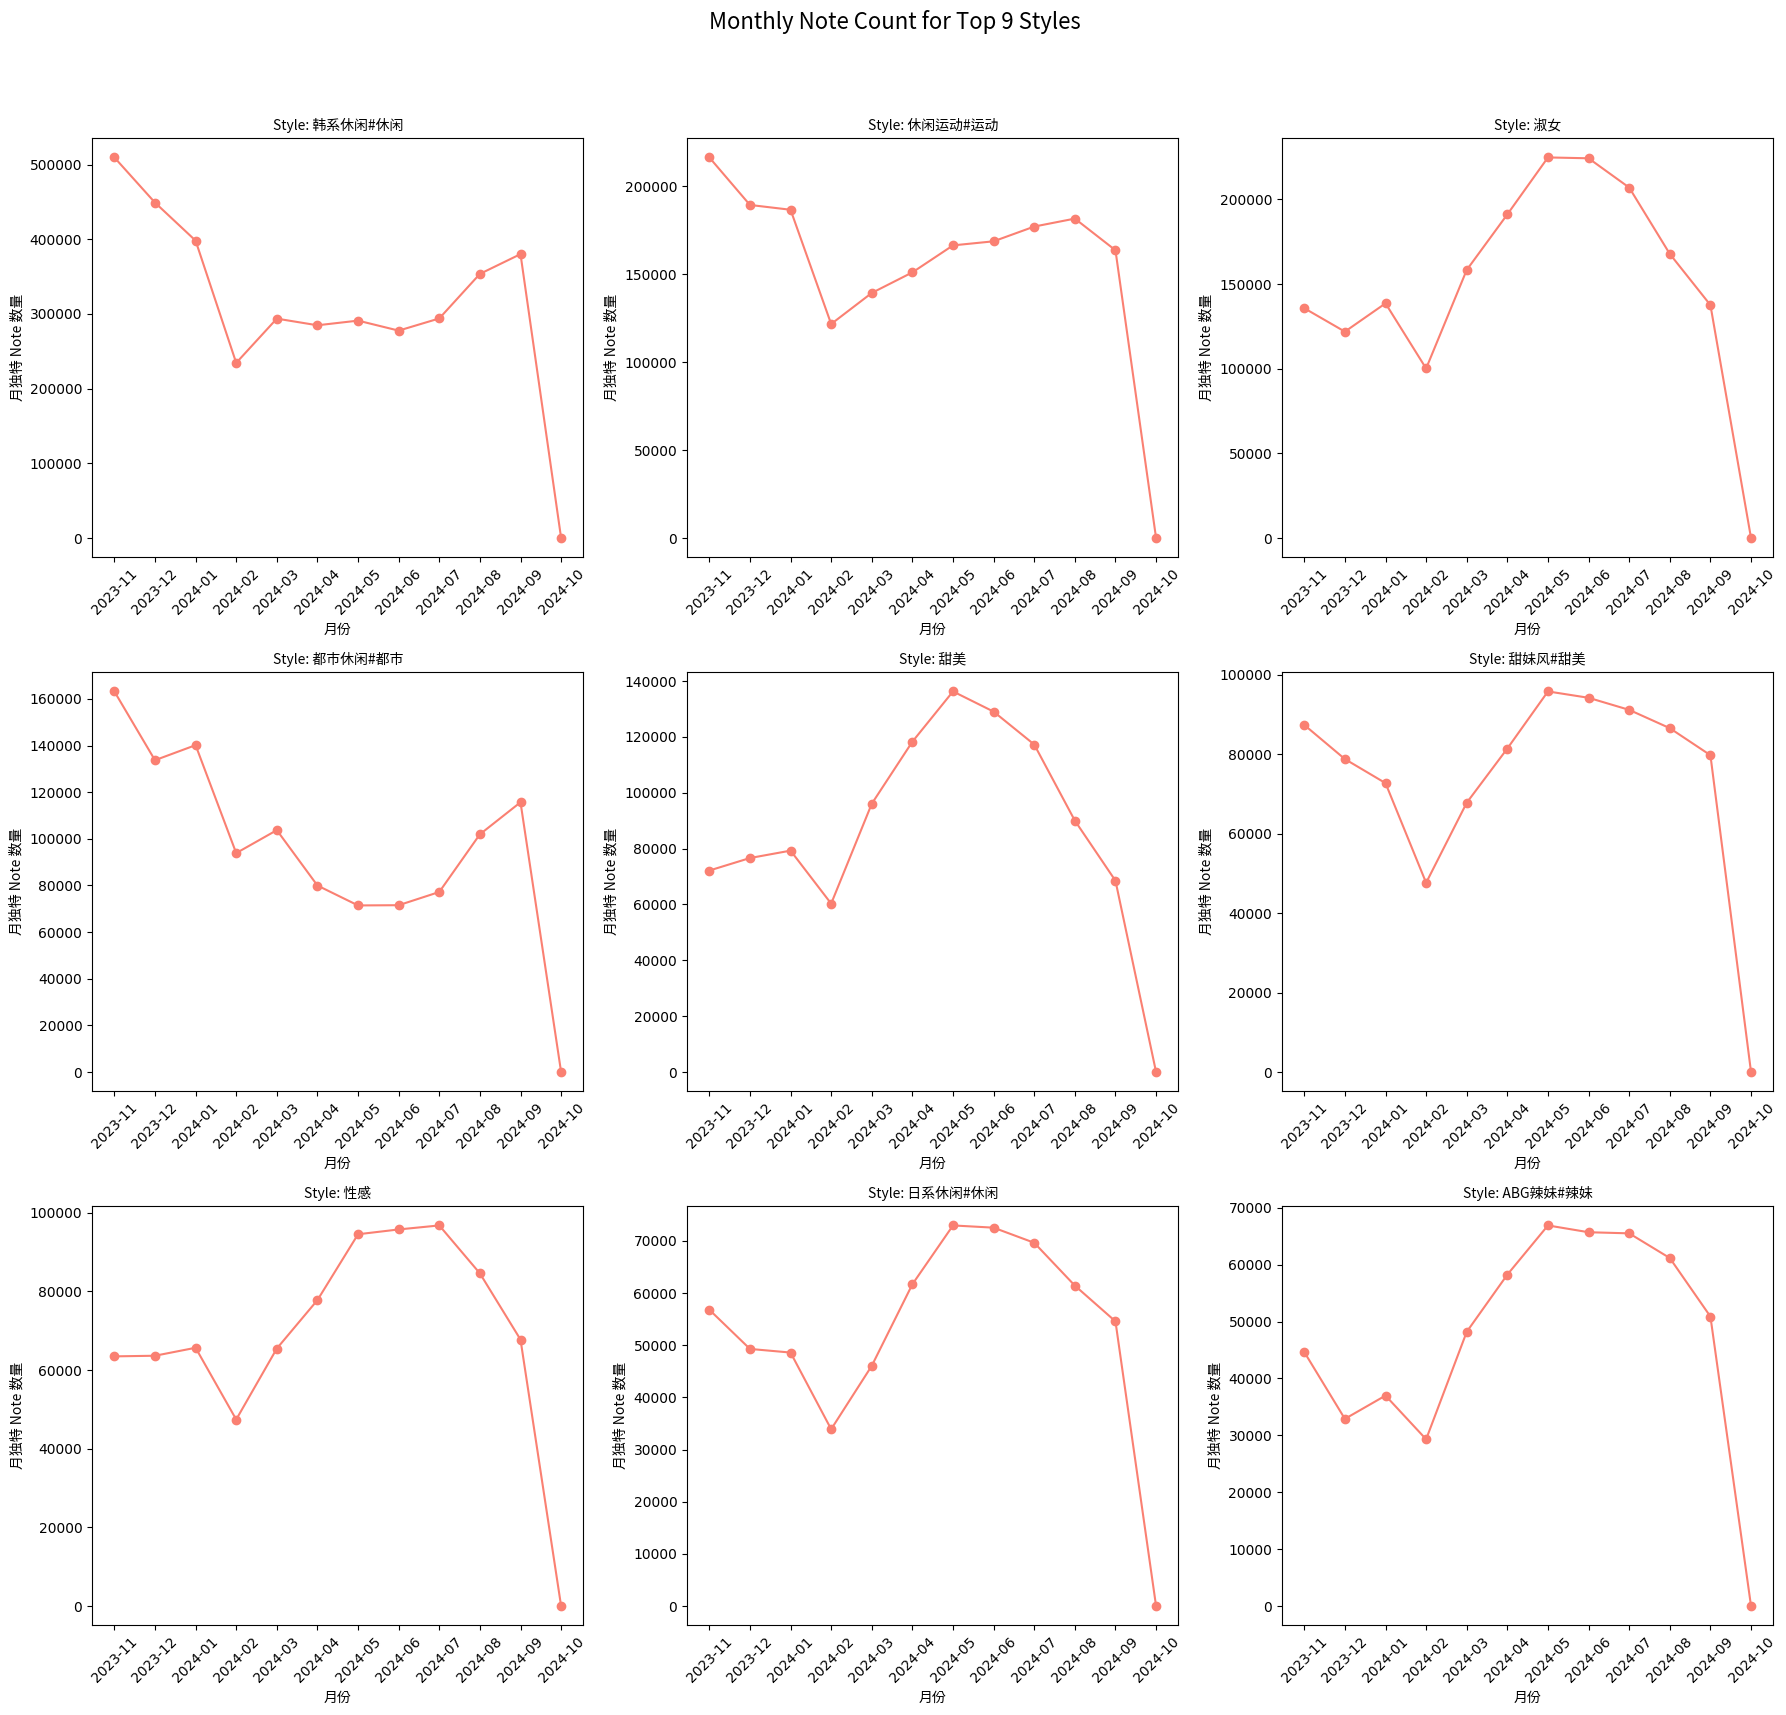

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties

# 加载数据
file_path = '/home/disk1/red_disk1/zhiyi/zhiyi_data/xhs_style_post_cleaned.csv'
data = pd.read_csv(file_path, encoding='utf-8', engine='python')

# 转换 'publish_time' 为日期格式，并提取天和月份
data['publish_time'] = pd.to_datetime(data['publish_time'], errors='coerce')
data['publish_day'] = data['publish_time'].dt.date
data['publish_month'] = data['publish_time'].dt.to_period('M')

# 按 style_new 和 publish_day 聚合独特 note_id 的日级计数
daily_counts = data.groupby(['style_new', 'publish_day'])['note_id'].nunique().reset_index(name='daily_note_count')

# 按 style_new 和 publish_month 聚合独特 note_id 的月级计数
monthly_counts = data.groupby(['style_new', 'publish_month'])['note_id'].nunique().reset_index(name='monthly_note_count')

# 找到 distinct note_id 数量最高的前 9 个风格
top_9_styles = data.groupby('style_new')['note_id'].nunique().nlargest(9).index

# 过滤前 9 个风格的数据
daily_counts = daily_counts[daily_counts['style_new'].isin(top_9_styles)]
monthly_counts = monthly_counts[monthly_counts['style_new'].isin(top_9_styles)]

# 定义日期范围和月份范围
date_range = pd.date_range(start='2023-11-01', end='2024-10-31', freq='D')
month_range = pd.period_range(start='2023-11', end='2024-10', freq='M')

# 加载中文字体
chinese_font = FontProperties(fname='/usr/share/fonts/opentype/noto/NotoSansCJK-Regular.ttc')

# 创建第一个 3x3 图布局，用于日级数据
fig_daily, axes_daily = plt.subplots(3, 3, figsize=(18, 18))
fig_daily.suptitle('Daily Note Count for Top 9 Styles', fontproperties=chinese_font, fontsize=16)

for i, style in enumerate(top_9_styles):
    style_daily_data = daily_counts[daily_counts['style_new'] == style]
    style_daily_data = style_daily_data.set_index('publish_day').reindex(date_range, fill_value=0).reset_index()
    style_daily_data = style_daily_data[['index', 'daily_note_count']]  # 只选择所需的两列
    style_daily_data.columns = ['publish_day', 'daily_note_count']
    
    ax = axes_daily[i // 3, i % 3]
    ax.plot(style_daily_data['publish_day'], style_daily_data['daily_note_count'], marker='o', color='skyblue')
    ax.set_title(f'Style: {style}', fontproperties=chinese_font)
    ax.set_xlabel('日期', fontproperties=chinese_font)  # 'Date' in Chinese
    ax.set_ylabel('日独特 Note 数量', fontproperties=chinese_font)  # 'Daily Distinct Note Count' in Chinese
    ax.tick_params(axis='x', rotation=45)

# 调整日级图布局
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# 创建第二个 3x3 图布局，用于月级数据
fig_monthly, axes_monthly = plt.subplots(3, 3, figsize=(18, 18))
fig_monthly.suptitle('Monthly Note Count for Top 9 Styles', fontproperties=chinese_font, fontsize=16)

for i, style in enumerate(top_9_styles):
    style_monthly_data = monthly_counts[monthly_counts['style_new'] == style]
    style_monthly_data = style_monthly_data.set_index('publish_month').reindex(month_range, fill_value=0).reset_index()
    style_monthly_data = style_monthly_data[['index', 'monthly_note_count']]  # 只选择所需的两列
    style_monthly_data.columns = ['publish_month', 'monthly_note_count']
    
    ax = axes_monthly[i // 3, i % 3]
    ax.plot(style_monthly_data['publish_month'].astype(str), style_monthly_data['monthly_note_count'], marker='o', color='salmon')
    ax.set_title(f'Style: {style}', fontproperties=chinese_font)
    ax.set_xlabel('月份', fontproperties=chinese_font)  # 'Month' in Chinese
    ax.set_ylabel('月独特 Note 数量', fontproperties=chinese_font)  # 'Monthly Distinct Note Count' in Chinese
    ax.tick_params(axis='x', rotation=45)

# 调整月级图布局
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()
